In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data into a Pandas DataFrame (COMMENTED OUT since this is only for Jupyter Notebook within your local computer)
# df = pd.read_csv('Original_Datasets/orbits.csv')
# df.head()

# Importing Dependencies to upload the orbits.csv file to Google Colab
from google.colab import files

# This will open a file chooser in Google Colab. Use it as you would upload any file.
uploaded = files.upload()

# Read in the CSV file and store it in a variable
df = pd.read_csv('orbits.csv')

Saving orbits.csv to orbits.csv


In [3]:
# Make a copy of the original DataFrame so if we need to run this again from scratch, all of the formatting runs smoothly
# Make a copy of the DataFrame
orbit_df = df.copy()

# Show the copy
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [4]:
# Checking for Unique values in Column 'Object Name' Orbit dataframe
unique_values_Obname_orbit = orbit_df['Object Name'].unique()
print(unique_values_Obname_orbit)

['433\xa0Eros' '719\xa0Albert' '887\xa0Alinda' ... '(2017\xa0CP5)'
 '(2017\xa0CR5)' '(6344\xa0P-L)']


In [5]:
# Get the total unique value length for the Object Name column
total_uniquevalues_Obname_orbit= len(unique_values_Obname_orbit)

# Show the number of unique values
total_uniquevalues_Obname_orbit

15635

In [6]:
# Checking for Unique values in Column 'Object Classification' Orbit dataframe
unique_values_Ob_Class = orbit_df['Object Classification'].unique()
print(unique_values_Ob_Class)

['Amor Asteroid' 'Apollo Asteroid (Hazard)' 'Apollo Asteroid'
 'Aten Asteroid' 'Aten Asteroid (Hazard)' 'Amor Asteroid (Hazard)'
 'Apohele Asteroid' 'Apohele Asteroid (Hazard)']


In [7]:
# Split the Object Classification column to extract the "Hazard" value and create a new column for these values
orbit_df[["Object Classification", "Hazardous"]] = orbit_df['Object Classification'].str.split('(', n=1, expand=True)

# Show the new DataFrame
orbit_df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,None
15631,(2017 CO5),Amor Asteroid,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,None
15632,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,None
15633,(2017 CR5),Apollo Asteroid,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,None


In [8]:
# Remove any leading and trailing whitespace characters from the strings in the "Object Classification" column of the orbit_df DataFrame.
orbit_df["Object Classification"] = orbit_df["Object Classification"].str.strip()

In [9]:
# Show the changed DataFrame
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None


In [10]:
# Print unique values before replacing the word 'Hazard)'
print("Unique values before replacement:", orbit_df['Hazardous'].unique())

# Replace 'Hazard)' with 'Hazard'
orbit_df['Hazardous'] = orbit_df['Hazardous'].replace('Hazard)', 'Hazard')

# Print unique values after name edit to confirm changes took place
print("Unique values after replacement:", orbit_df['Hazardous'].unique())

Unique values before replacement: [None 'Hazard)']
Unique values after replacement: [None 'Hazard']


In [11]:
# Find out if there are null values in the dataframe
null_values = orbit_df.isnull().sum()
print(null_values)

Object Name                                     0
Object Classification                           0
Epoch (TDB)                                     0
Orbit Axis (AU)                                 0
Orbit Eccentricity                              0
Orbit Inclination (deg)                         0
Perihelion Argument (deg)                       0
Node Longitude (deg)                            0
Mean Anomoly (deg)                              0
Perihelion Distance (AU)                        0
Aphelion Distance (AU)                          0
Orbital Period (yr)                             0
Minimum Orbit Intersection Distance (AU)        0
Orbital Reference                               0
Asteroid Magnitude                              1
Hazardous                                   13856
dtype: int64


In [12]:
# Drop nulls from the Object Name column
orbit_df.dropna(subset=["Object Name"], inplace=True)

In [13]:
# Drop the number 9 from the Object Name column
orbit_df.dropna(subset=["Asteroid Magnitude"], inplace=True)

In [14]:
# Display dataframe with changes
orbit_df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,None
15631,(2017 CO5),Amor Asteroid,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,None
15632,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,None
15633,(2017 CR5),Apollo Asteroid,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,None


In [15]:
# Make a copy of the DataFrame before dropping columns
orbit_df2 = orbit_df.copy()

# Show the copy
orbit_df2.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None


In [16]:
# Drop the 'Object Name' column from the dataframe.
orbit_df2 = orbit_df2.drop(columns=['Object Name'])

# Check columns after dropping
print("Columns after dropping 'Object Name':", orbit_df2.columns)

Columns after dropping 'Object Name': Index(['Object Classification', 'Epoch (TDB)', 'Orbit Axis (AU)',
       'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude', 'Hazardous'],
      dtype='object')


In [17]:
# IF above we were dropping more than one column
# orbit_df2 = orbit_df2.drop(columns=['Object Name', 'Object Classification']) or whichever column to drop.

In [19]:
# Once the changes have been verified, store the dataframe copy to the original variable for continuation
orbit_df = orbit_df2

In [20]:
# Save cleaned DataFrame into a new CSV file
orbit_df.to_csv('cleaned_Asteroid_orbit.csv', index=False)

# Show a sample of the DataFrame that we are saving
orbit_df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None


The above was created using Jupyter Notebook.
The next section will be created using this Jupyter Notebook file via Google Colab. Note that the colab file might have a different cel to read the csv file.

## Building the ML model

In [21]:
# Import the modules for the ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [22]:
# Make a copy of the DataFrame
orbit_df_copy = orbit_df.copy()

In [23]:
# Use get dummies to convert Object classification to binary values
obj_class_df = pd.get_dummies(orbit_df['Object Classification'], dtype=int)
obj_class_df

,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
15630,0,0,1,0
15631,1,0,0,0
15632,1,0,0,0
15633,0,0,1,0


In [24]:
# Use get dummies to convert Object classification to binary values
hazard_df = pd.get_dummies(orbit_df['Hazardous'], dtype=int)
hazard_df

,Hazard
0,0
1,0
2,0
3,0
4,0
...,...
15630,0
15631,0
15632,0
15633,0


In [25]:
# Concatenate Original Dataframe with the Hazard dataframe

orbits_concat = pd.concat([orbit_df_copy, hazard_df], axis=1)
orbits_concat.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous,Hazard
0,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None,0
1,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None,0
2,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None,0
3,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None,0
4,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None,0


In [26]:
# Concatenate Previous Dataframe with the Object Classification dataframe

orbits_concat_objclass_haz = pd.concat([obj_class_df, orbits_concat], axis=1)
orbits_concat_objclass_haz.head()

,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous,Hazard
0,1,0,0,0,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None,0
1,1,0,0,0,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None,0
2,1,0,0,0,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None,0
3,1,0,0,0,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None,0
4,1,0,0,0,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None,0


In [27]:
# IF above we were dropping more than one column
orbits_concat2 = orbits_concat_objclass_haz.drop(columns=['Object Classification', 'Hazardous'])

# Show sample DataFrame
orbits_concat2.head()


,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazard
0,1,0,0,0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,0
1,1,0,0,0,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,0
2,1,0,0,0,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,0
3,1,0,0,0,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,0
4,1,0,0,0,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,0


In [28]:
# Split preprocessed data into features and target arrays
# Define features set
# Make a copy of the Dataset
X = orbits_concat2.copy()

# Drop the column
X.drop(columns=['Hazard'], axis=1, inplace=True)

# Display the values the features columns
X.head()

,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,1,0,0,0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,1,0,0,0,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,1,0,0,0,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1,0,0,0,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1,0,0,0,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [29]:
# Define Target Vector
y = orbits_concat2['Hazard'].values

# Show first 5 values in the array
y[:5]

array([0, 0, 0, 0, 0])

In [30]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
# Transform the training data
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

In [33]:
# Define the model
nn_model = tf.keras.models.Sequential()

# Input Layer
nn_model.add(Dense(units=40, activation="relu", input_dim=X_train_scaled.shape[1]))

# Add our first hidden layer
nn_model.add(Dense(units=20, activation="relu"))

# Add our second hidden layer
nn_model.add(Dense(units=20, activation="relu"))

# Add our third hidden layer
nn_model.add(Dense(units=20, activation="relu"))

# Output layer
nn_model.add(Dense(units=1, activation='sigmoid'))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                720       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2401 (9.38 KB)
Trainable params: 2401 (9.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Fit the model to the trianing data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.15, validation_data=(X_test_scaled, y_test))

Epoch 1/100
367/367 [==============================] - 3s 3ms/step - loss: 0.2387 - accuracy: 0.9035 - val_loss: 0.1341 - val_accuracy: 0.9545
Epoch 2/100
367/367 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9608 - val_loss: 0.0816 - val_accuracy: 0.9706
Epoch 3/100
367/367 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9737 - val_loss: 0.0707 - val_accuracy: 0.9757
Epoch 4/100
367/367 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9811 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 5/100
367/367 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9827 - val_loss: 0.0532 - val_accuracy: 0.9831
Epoch 6/100
367/367 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9863 - val_loss: 0.0601 - val_accuracy: 0.9821
Epoch 7/100
367/367 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9881 - val_loss: 0.0456 - val_accuracy: 0.9841

Comparison of using 3 hidden layers and the accuracy results below
* 1st attempt:
123/123 - 0s - 629us/step - accuracy: 0.9923 - loss: 0.0503
Loss: 0.05025872215628624, Accuracy: 0.992325425148010

* 2nd attempt:
123/123 - 0s - loss: 0.0464 - accuracy: 0.9890 - 180ms/epoch - 1ms/step
Loss: 0.04644397273659706, Accuracy: 0.9889997243881226

Note: If this code is ran again, the results will vary. Thus this is just a record of the original results..


In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


123/123 - 0s - loss: 0.0464 - accuracy: 0.9890 - 180ms/epoch - 1ms/step
Loss: 0.04644397273659706, Accuracy: 0.9889997243881226


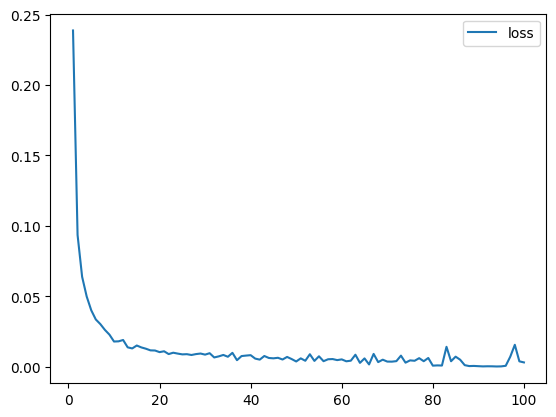

In [37]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

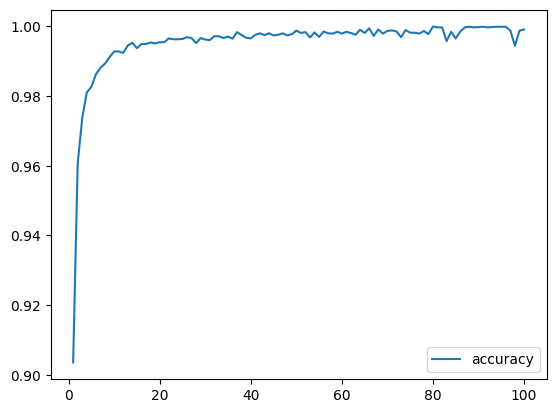

In [38]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [39]:
# Export our model to HDF5 file
# Load Dependencies to export, save, and download the model
import os
from google.colab import files

# Create a directory
os.makedirs('/nn_Asteroid_Impact_Model', exist_ok=True)

# Save the model as an h5 file
nn_model.save('/nn_Asteroid_Impact_Model/Asteroid_Impact_Model.h5')

# Download the model file
files.download('/nn_Asteroid_Impact_Model/Asteroid_Impact_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>